In [1]:
import bagpy
from bagpy import bagreader
import pandas as pd
import seaborn as sea
import statistics
import numpy as np
import matplotlib.pyplot as plt

In [2]:
b = bagreader('/home/francis-kalliath/bagfile/francis.bag')

[INFO]  Data folder /home/francis-kalliath/bagfile/francis already exists. Not creating.


In [3]:
b.topic_table

,Topics,Types,Message Count,Frequency
0,/imu,imu_driver/imu_msg,34317,40.02313


In [4]:
def data_csv(b):
    csvfiles = []
    for t in b.topics:
        data = b.message_by_topic(t)
        csvfiles.append(data)
        
    print(csvfiles[0])
    data = pd.read_csv(csvfiles[0])
    return data
            

In [5]:
csv_data = data_csv(b)

/home/francis-kalliath/bagfile/francis/imu.csv


In [6]:
f = pd.read_csv("/home/francis-kalliath/bagfile/francis/imu.csv")

In [7]:
f

,Time,header.seq,header.stamp.secs,header.stamp.nsecs,header.frame_id,IMU.header.seq,IMU.header.stamp.secs,IMU.header.stamp.nsecs,IMU.header.frame_id,IMU.orientation.x,...,IMU.linear_acceleration.z,IMU.linear_acceleration_covariance,MagField.header.seq,MagField.header.stamp.secs,MagField.header.stamp.nsecs,MagField.header.frame_id,MagField.magnetic_field.x,MagField.magnetic_field.y,MagField.magnetic_field.z,MagField.magnetic_field_covariance
0,1.666235e+09,1616,1666235253,929118633,IMU_FRAME1,0,0,0,NaN,0.000454,...,-9.823,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)",0,0,0,NaN,-0.1615,-0.1533,0.4427,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)"
1,1.666235e+09,1617,1666235253,954052686,IMU_FRAME1,0,0,0,NaN,0.000445,...,-9.829,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)",0,0,0,NaN,-0.1624,-0.1523,0.4345,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)"
2,1.666235e+09,1618,1666235253,979224920,IMU_FRAME1,0,0,0,NaN,0.000441,...,-9.809,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)",0,0,0,NaN,-0.1635,-0.1437,0.4436,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)"
3,1.666235e+09,1619,1666235254,4264354,IMU_FRAME1,0,0,0,NaN,0.000433,...,-9.841,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)",0,0,0,NaN,-0.1625,-0.1512,0.4450,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)"
4,1.666235e+09,1620,1666235254,29371976,IMU_FRAME1,0,0,0,NaN,0.000429,...,-9.844,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)",0,0,0,NaN,-0.1645,-0.1544,0.4332,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34312,1.666236e+09,35928,1666236111,734188318,IMU_FRAME1,0,0,0,NaN,0.000012,...,-9.823,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)",0,0,0,NaN,-0.1636,-0.1555,0.4437,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)"
34313,1.666236e+09,35929,1666236111,759589910,IMU_FRAME1,0,0,0,NaN,0.000009,...,-9.822,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)",0,0,0,NaN,-0.1624,-0.1555,0.4321,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)"
34314,1.666236e+09,35930,1666236111,784431934,IMU_FRAME1,0,0,0,NaN,0.000009,...,-9.862,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)",0,0,0,NaN,-0.1615,-0.1458,0.4438,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)"
34315,1.666236e+09,35931,1666236111,809094667,IMU_FRAME1,0,0,0,NaN,-0.000002,...,-9.821,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)",0,0,0,NaN,-0.1624,-0.1480,0.4356,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)"


In [8]:
f['header.stamp.secs_offset'] = f['header.stamp.secs'] - 1666235253

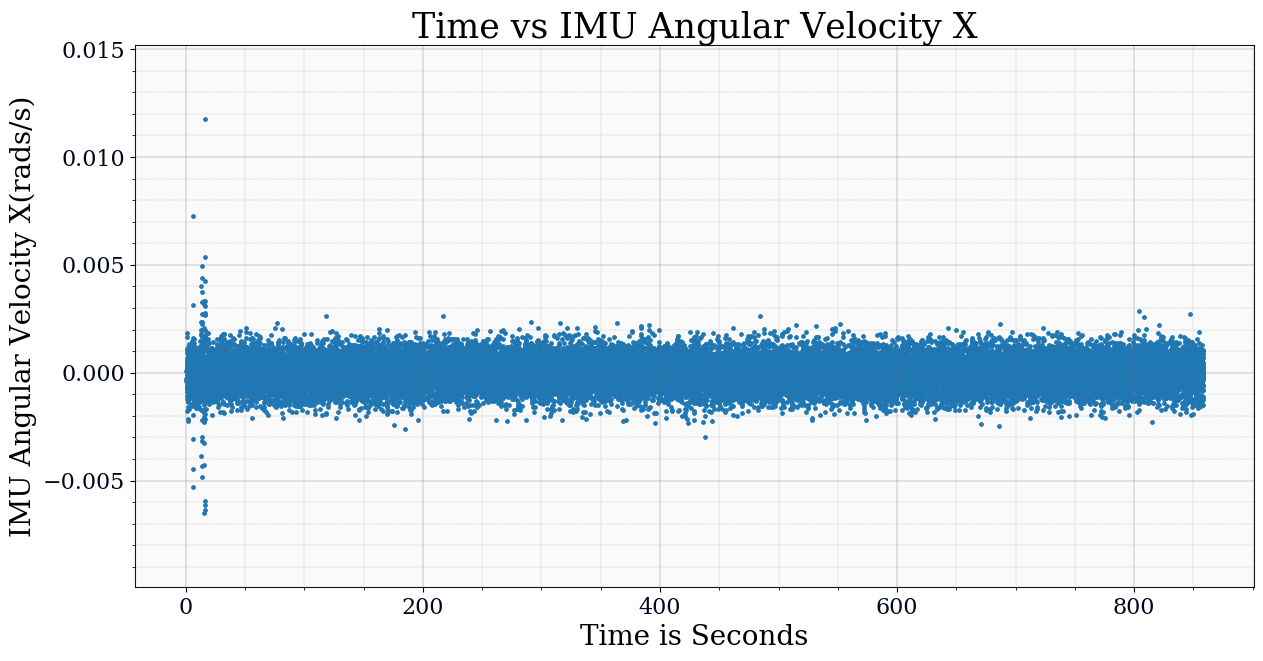

8.45003933910307e-07
0.0006750315591992023


In [9]:

fig, a = bagpy.create_fig(1)
a[0].scatter(x=f['header.stamp.secs_offset'], y='IMU.angular_velocity.x',data=f, s=6)
plt.title("Time vs IMU Angular Velocity X")
plt.xlabel("Time is Seconds")
plt.ylabel("IMU Angular Velocity X(rads/s)")
plt.show()
print(statistics.mean(f['IMU.angular_velocity.x']))
print(statistics.stdev(f['IMU.angular_velocity.x']))

Text(0.5, 0, 'IMU Angular Velocity X(rads/s)')

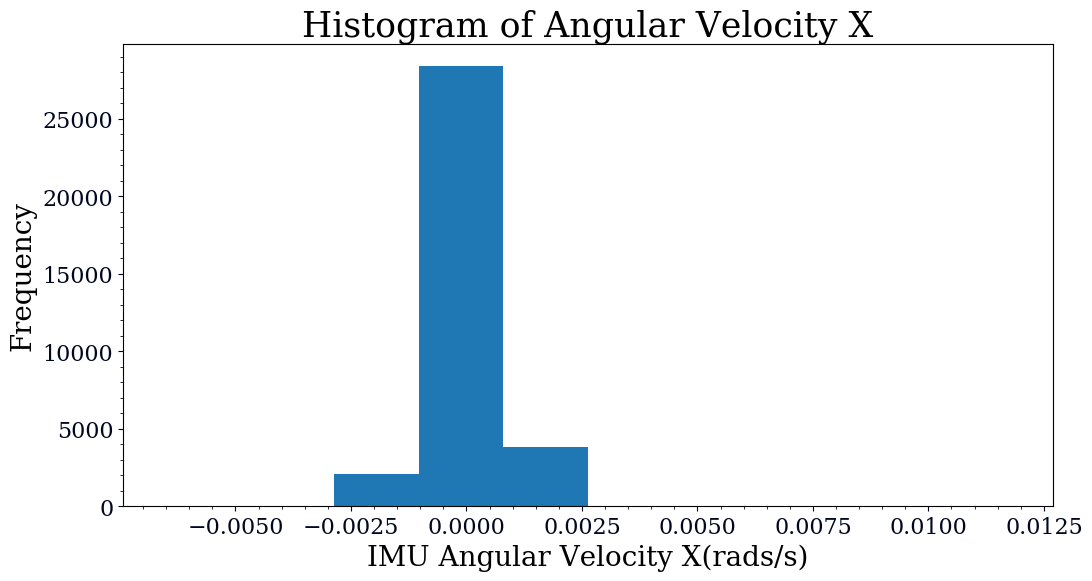

In [10]:
f['IMU.angular_velocity.x'].plot(kind='hist')
plt.title("Histogram of Angular Velocity X")
plt.xlabel("IMU Angular Velocity X(rads/s)")

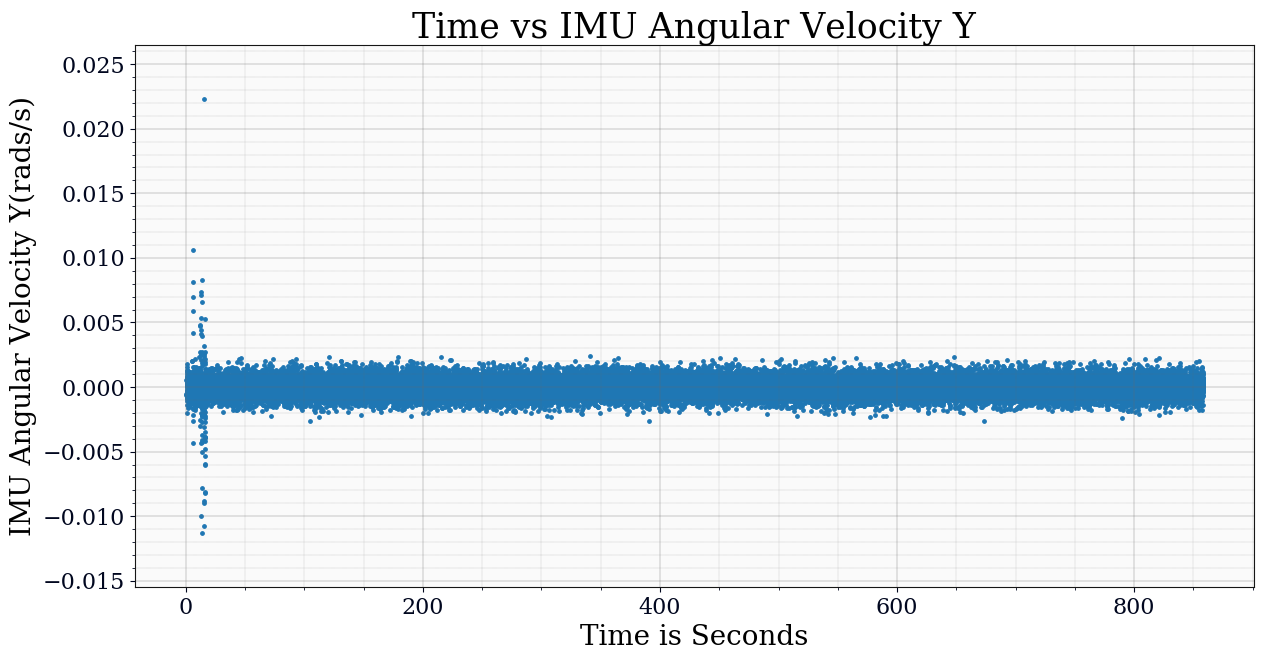

7.040038464900777e-06
0.0006973010061896531


In [11]:
fig, a = bagpy.create_fig(1)
a[0].scatter(x=f['header.stamp.secs_offset'], y='IMU.angular_velocity.y',data=f, s=6)
plt.title("Time vs IMU Angular Velocity Y")
plt.xlabel("Time is Seconds")
plt.ylabel("IMU Angular Velocity Y(rads/s)")
plt.show()
print(statistics.mean(f['IMU.angular_velocity.y']))
print(statistics.stdev(f['IMU.angular_velocity.y']))

Text(0.5, 0, 'IMU Angular Velocity Y(rads/s)')

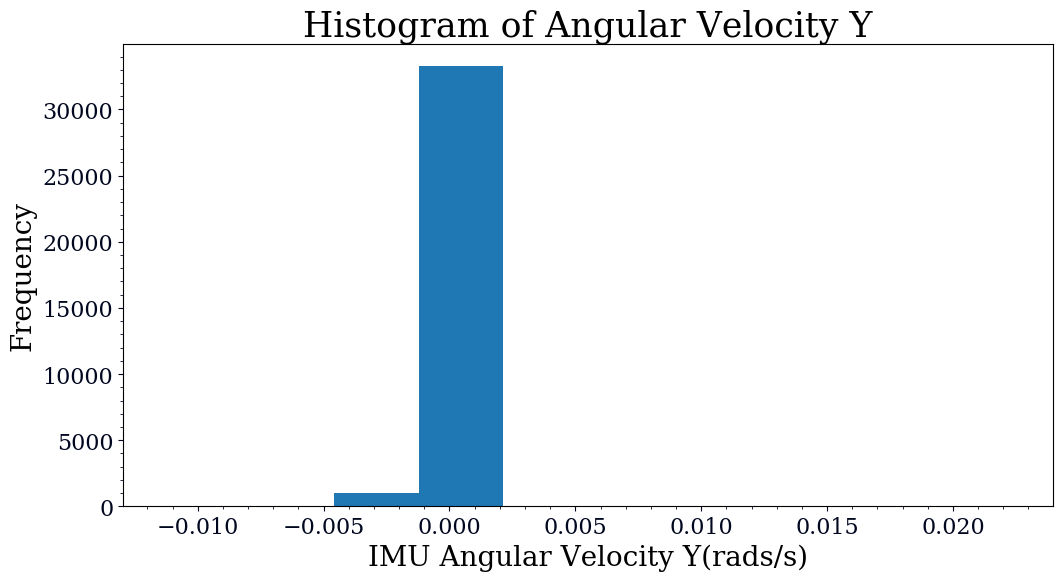

In [12]:
f['IMU.angular_velocity.y'].plot(kind='hist')
plt.title("Histogram of Angular Velocity Y")
plt.xlabel("IMU Angular Velocity Y(rads/s)")

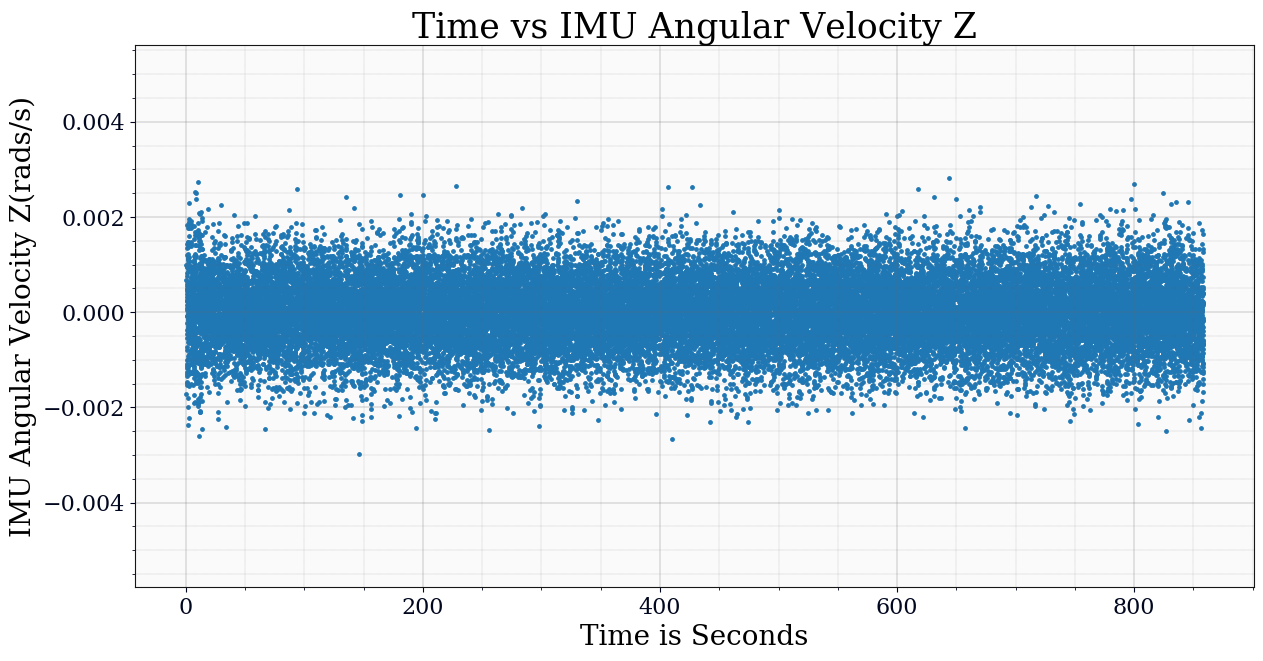

-5.699886353702247e-06
0.0006883359121079397


In [13]:
fig, a = bagpy.create_fig(1)
a[0].scatter(x=f['header.stamp.secs_offset'], y='IMU.angular_velocity.z',data=f, s=6)
plt.title("Time vs IMU Angular Velocity Z")
plt.xlabel("Time is Seconds")
plt.ylabel("IMU Angular Velocity Z(rads/s)")
plt.show()
print(statistics.mean(f['IMU.angular_velocity.z']))
print(statistics.stdev(f['IMU.angular_velocity.z']))

Text(0.5, 0, 'IMU Angular Velocity Z(rads/s)')

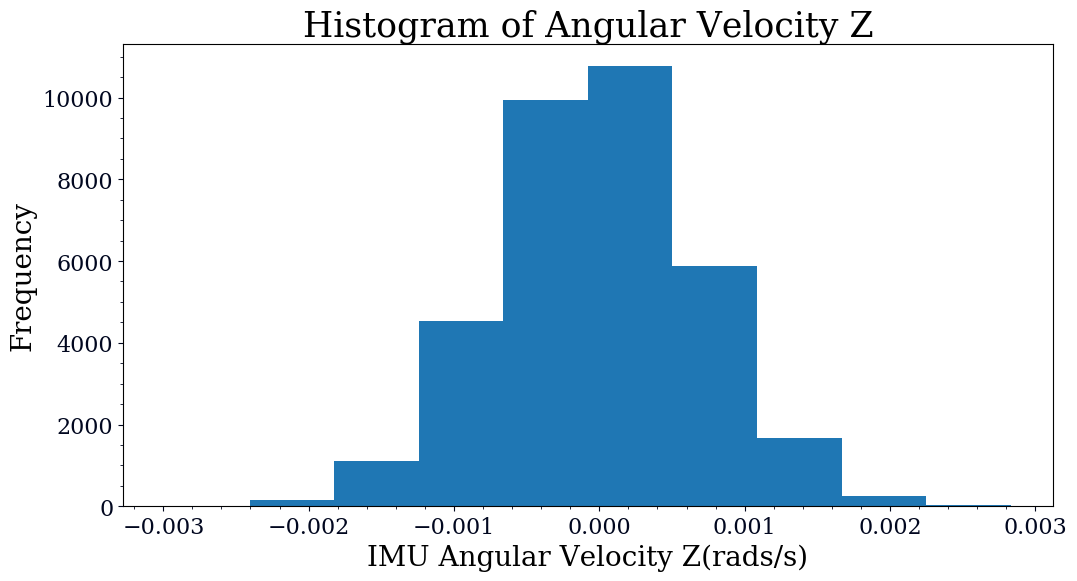

In [14]:
f['IMU.angular_velocity.z'].plot(kind='hist')
plt.title("Histogram of Angular Velocity Z")
plt.xlabel("IMU Angular Velocity Z(rads/s)")

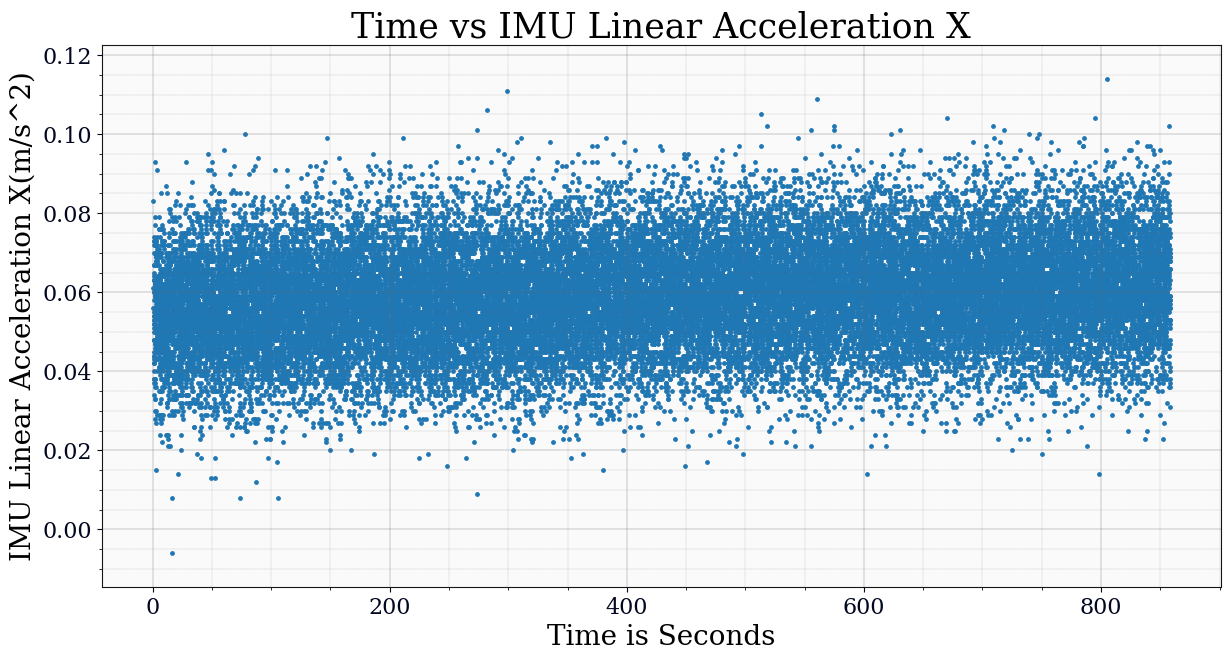

0.05899358918320366
0.012487625988210621


In [15]:
fig, a = bagpy.create_fig(1)
a[0].scatter(x=f['header.stamp.secs_offset'], y='IMU.linear_acceleration.x',data=f, s=6)
plt.title("Time vs IMU Linear Acceleration X")
plt.xlabel("Time is Seconds")
plt.ylabel("IMU Linear Acceleration X(m/s^2)")
plt.show()
print(statistics.mean(f['IMU.linear_acceleration.x']))
print(statistics.stdev(f['IMU.linear_acceleration.x']))

Text(0.5, 0, 'IMU linear_acceleration X(m/s^2)')

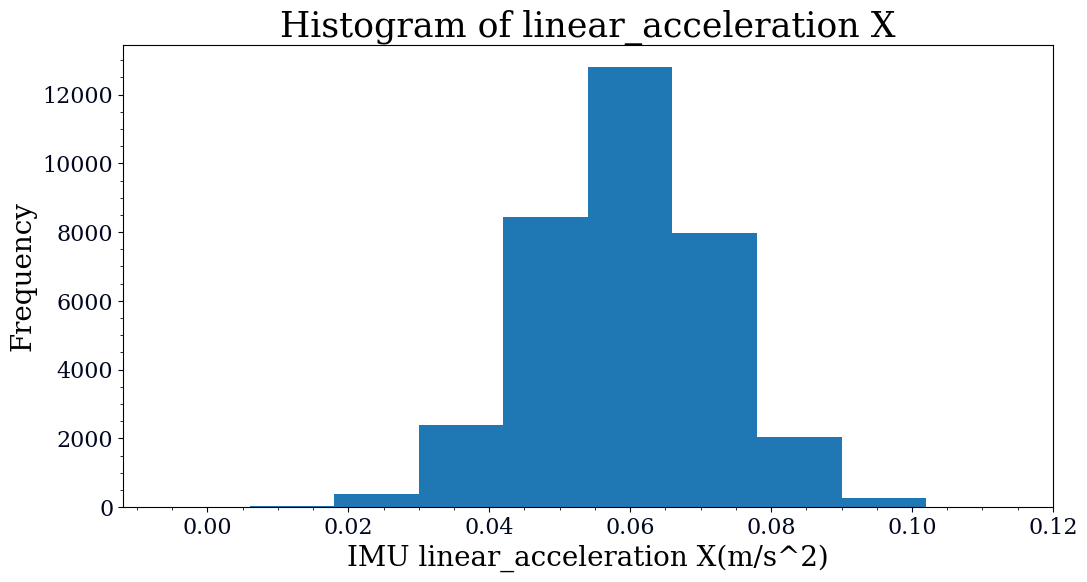

In [16]:
f['IMU.linear_acceleration.x'].plot(kind='hist')
plt.title("Histogram of linear_acceleration X")
plt.xlabel("IMU linear_acceleration X(m/s^2)")

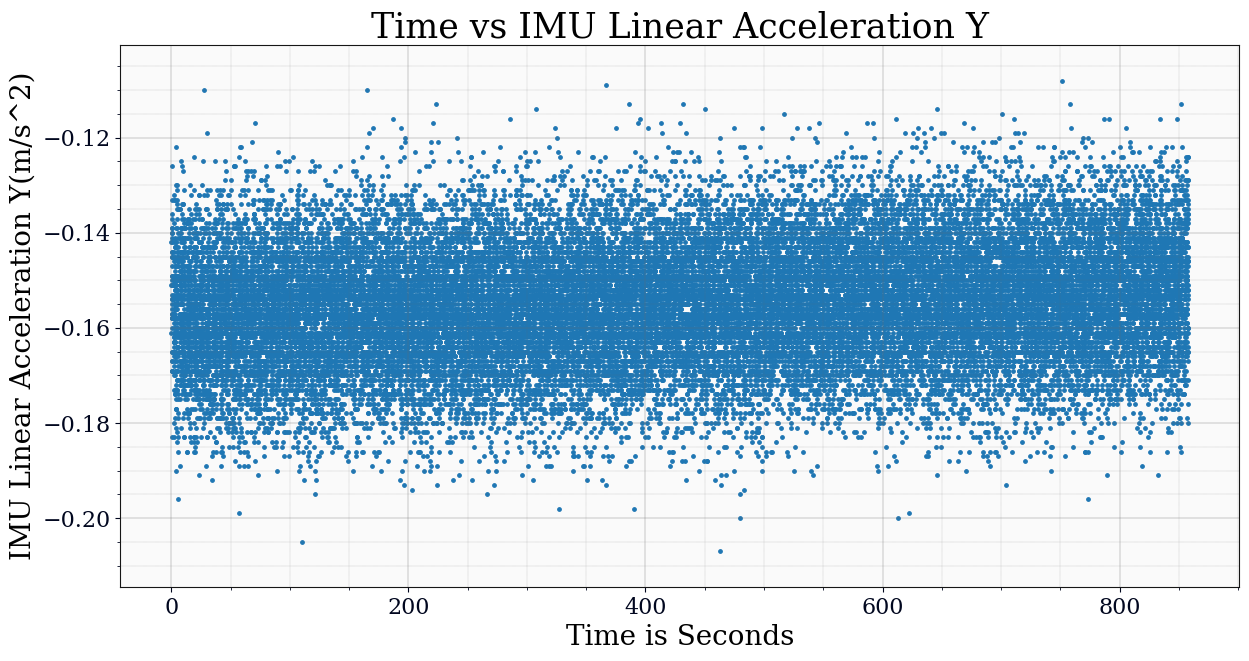

-0.15500713931870502
0.01207508377035805


In [17]:
fig, a = bagpy.create_fig(1)
a[0].scatter(x=f['header.stamp.secs_offset'], y='IMU.linear_acceleration.y',data=f, s=6)
plt.title("Time vs IMU Linear Acceleration Y")
plt.xlabel("Time is Seconds")
plt.ylabel("IMU Linear Acceleration Y(m/s^2)")
plt.show()
print(statistics.mean(f['IMU.linear_acceleration.y']))
print(statistics.stdev(f['IMU.linear_acceleration.y']))

Text(0.5, 0, 'IMU linear_acceleration Y(m/s^2)')

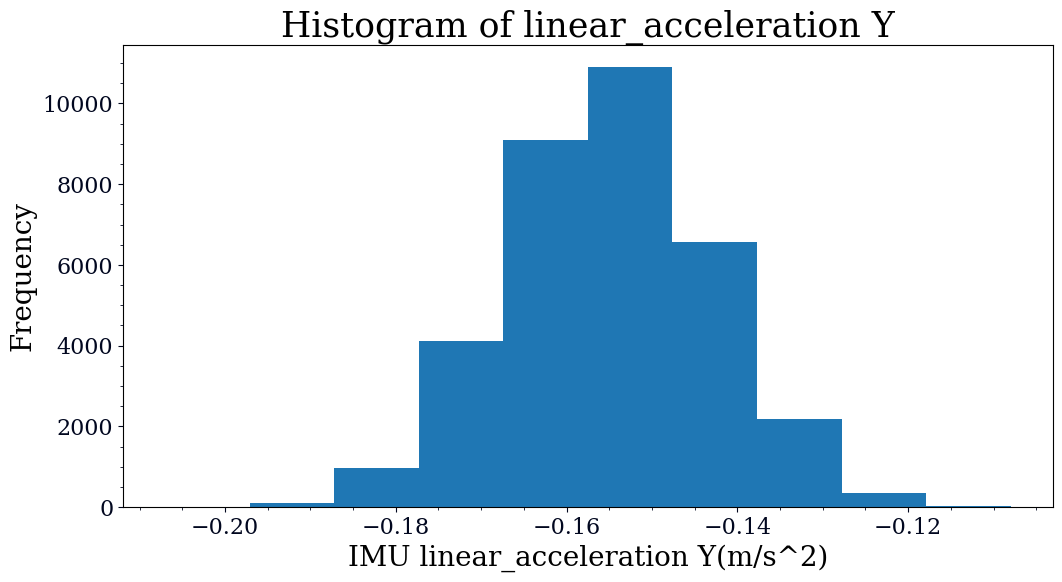

In [18]:
f['IMU.linear_acceleration.y'].plot(kind='hist')
plt.title("Histogram of linear_acceleration Y")
plt.xlabel("IMU linear_acceleration Y(m/s^2)")

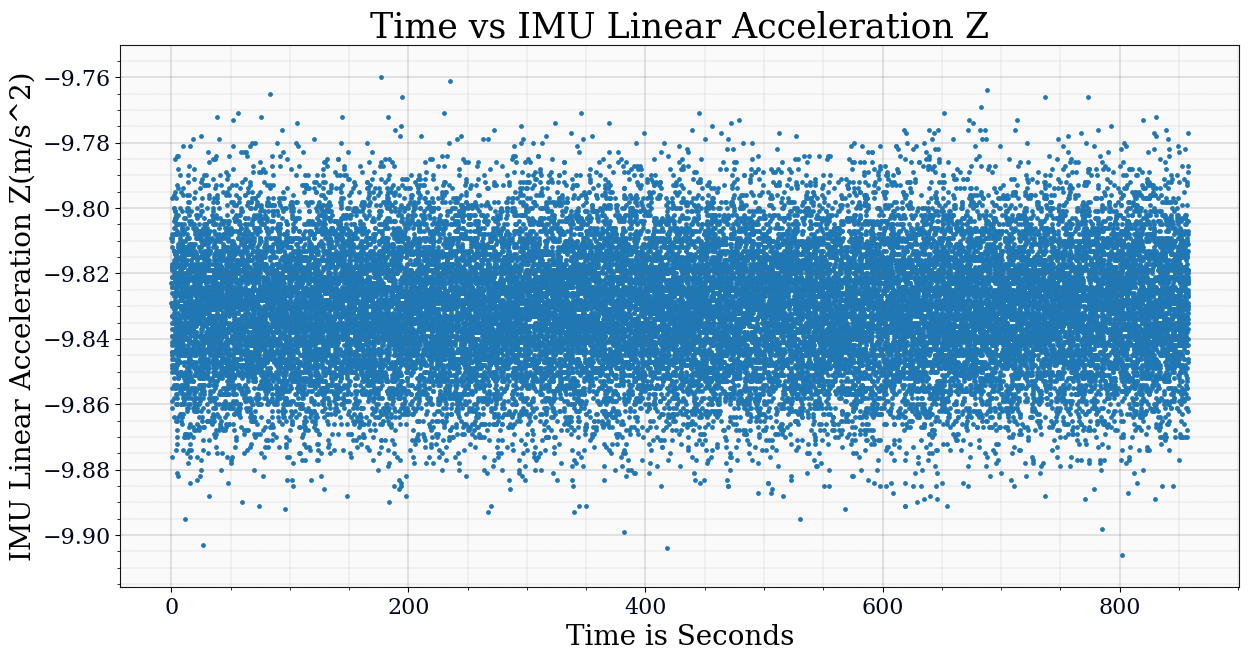

-9.830795611504502
0.018124926228365045


In [19]:
fig, a = bagpy.create_fig(1)
a[0].scatter(x=f['header.stamp.secs_offset'], y='IMU.linear_acceleration.z',data=f, s=6)
plt.title("Time vs IMU Linear Acceleration Z")
plt.xlabel("Time is Seconds")
plt.ylabel("IMU Linear Acceleration Z(m/s^2)")
plt.show()
print(statistics.mean(f['IMU.linear_acceleration.z']))
print(statistics.stdev(f['IMU.linear_acceleration.z']))

Text(0.5, 0, 'IMU linear_acceleration Z(m/s^2)')

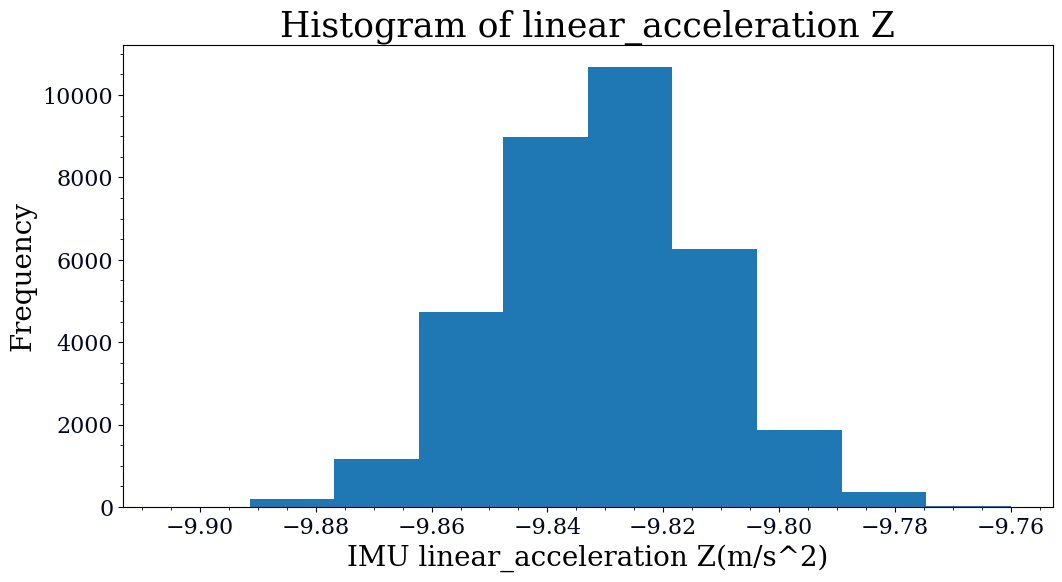

In [20]:
f['IMU.linear_acceleration.z'].plot(kind='hist')
plt.title("Histogram of linear_acceleration Z")
plt.xlabel("IMU linear_acceleration Z(m/s^2)")

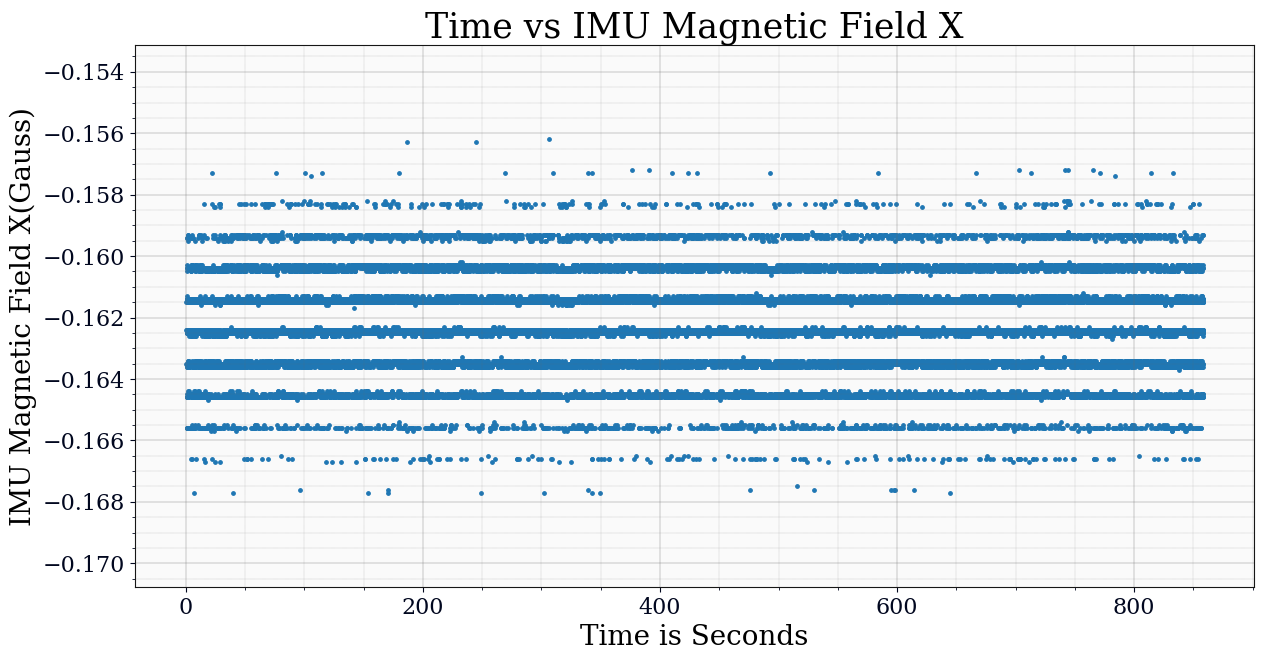

-0.16230202232129848
0.0015139251413373524


In [21]:
fig, a = bagpy.create_fig(1)
a[0].scatter(x=f['header.stamp.secs_offset'], y='MagField.magnetic_field.x',data=f, s=6)
plt.title("Time vs IMU Magnetic Field X")
plt.xlabel("Time is Seconds")
plt.ylabel("IMU Magnetic Field X(Gauss)")
plt.show()
print(statistics.mean(f['MagField.magnetic_field.x']))
print(statistics.stdev(f['MagField.magnetic_field.x']))

Text(0.5, 0, 'IMU Magnetic Field X(Gauss)')

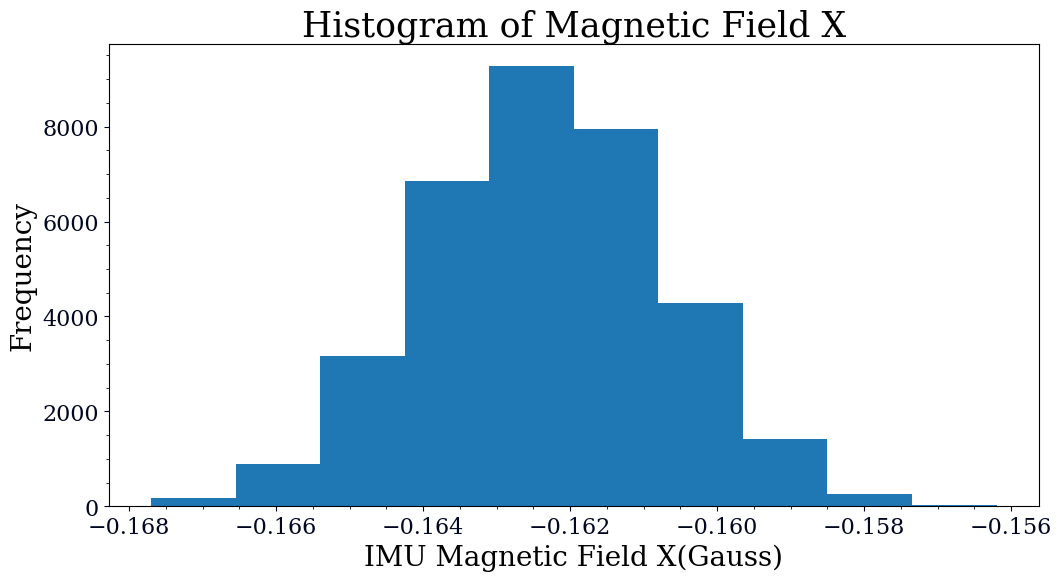

In [22]:
f['MagField.magnetic_field.x'].plot(kind='hist')
plt.title("Histogram of Magnetic Field X")
plt.xlabel("IMU Magnetic Field X(Gauss)")

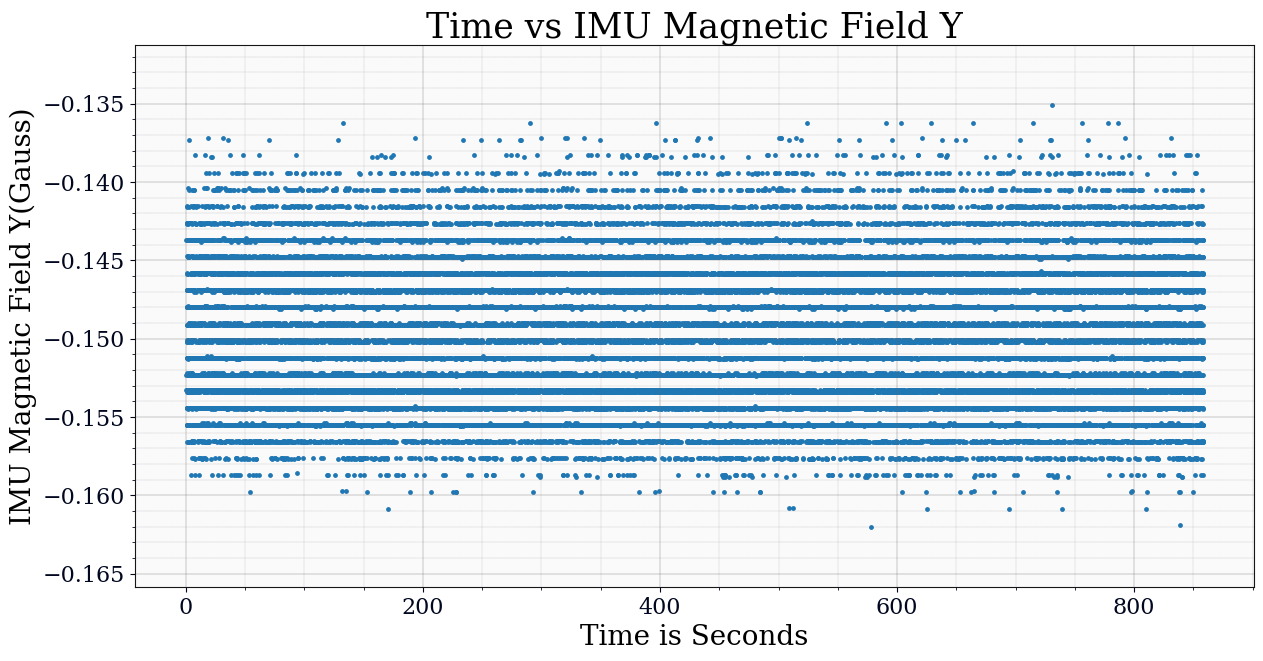

-0.1497981262930909
0.004431024685355393


In [23]:
fig, a = bagpy.create_fig(1)
a[0].scatter(x=f['header.stamp.secs_offset'], y='MagField.magnetic_field.y',data=f,s=6)
plt.title("Time vs IMU Magnetic Field Y")
plt.xlabel("Time is Seconds")
plt.ylabel("IMU Magnetic Field Y(Gauss)")
plt.show()
print(statistics.mean(f['MagField.magnetic_field.y']))
print(statistics.stdev(f['MagField.magnetic_field.y']))

Text(0.5, 0, 'IMU Magnetic Field Y(Gauss)')

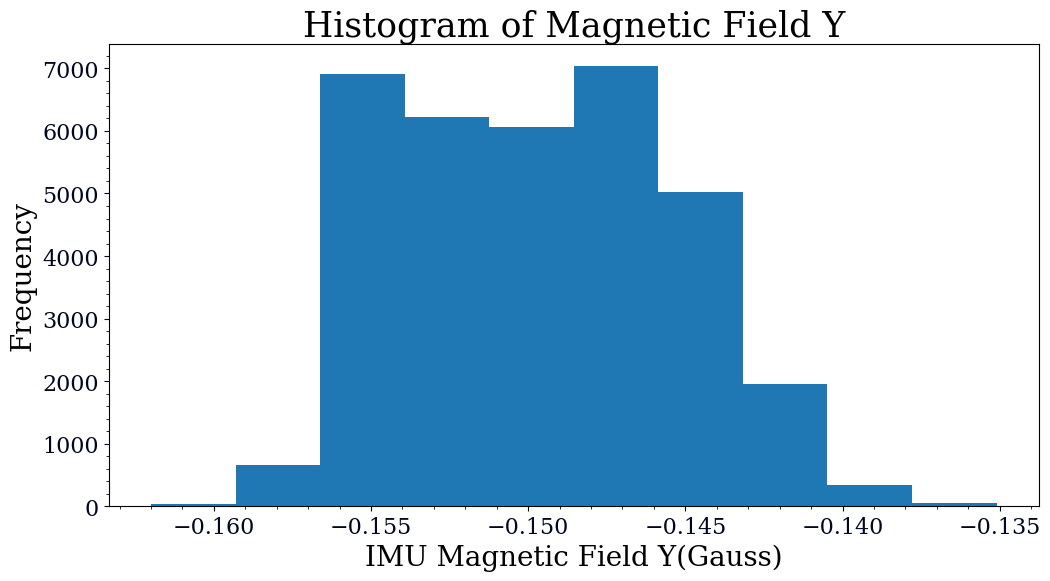

In [24]:
f['MagField.magnetic_field.y'].plot(kind='hist')
plt.title("Histogram of Magnetic Field Y")
plt.xlabel("IMU Magnetic Field Y(Gauss)")

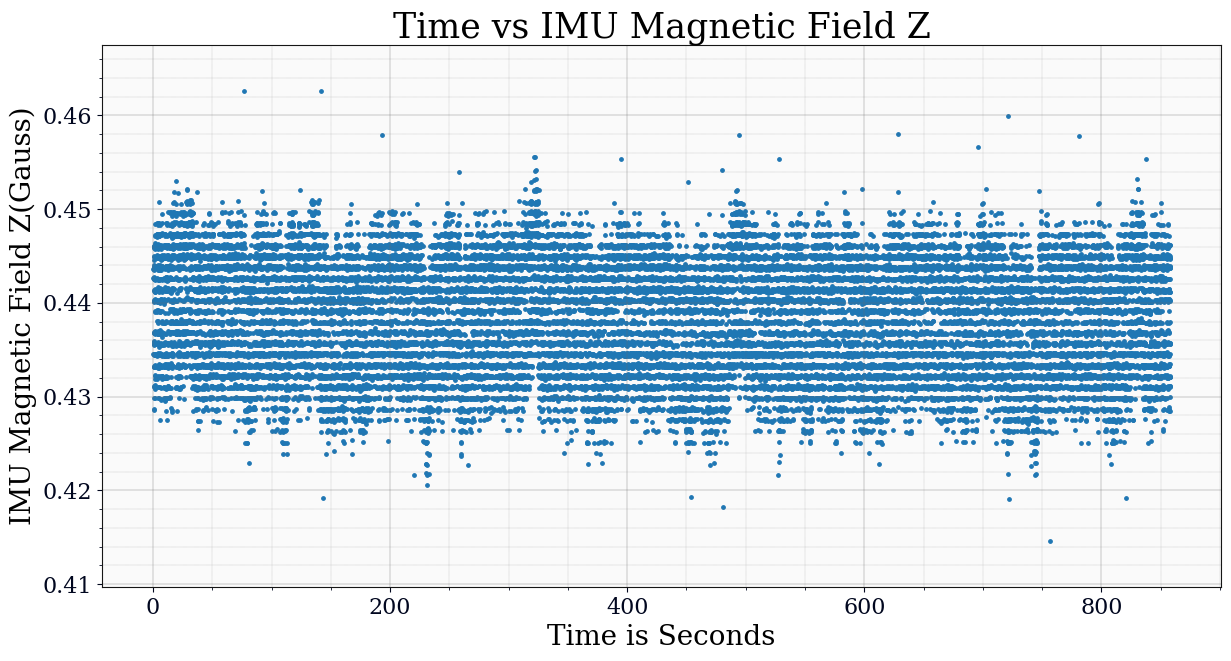

0.4383804353527406
0.0058036162269288335


In [25]:
fig, a = bagpy.create_fig(1)
a[0].scatter(x=f['header.stamp.secs_offset'], y='MagField.magnetic_field.z',data=f, s=6)
plt.title("Time vs IMU Magnetic Field Z")
plt.xlabel("Time is Seconds")
plt.ylabel("IMU Magnetic Field Z(Gauss)")
plt.show()
print(statistics.mean(f['MagField.magnetic_field.z']))
print(statistics.stdev(f['MagField.magnetic_field.z']))

Text(0.5, 0, 'IMU Magnetic Field z(Gauss)')

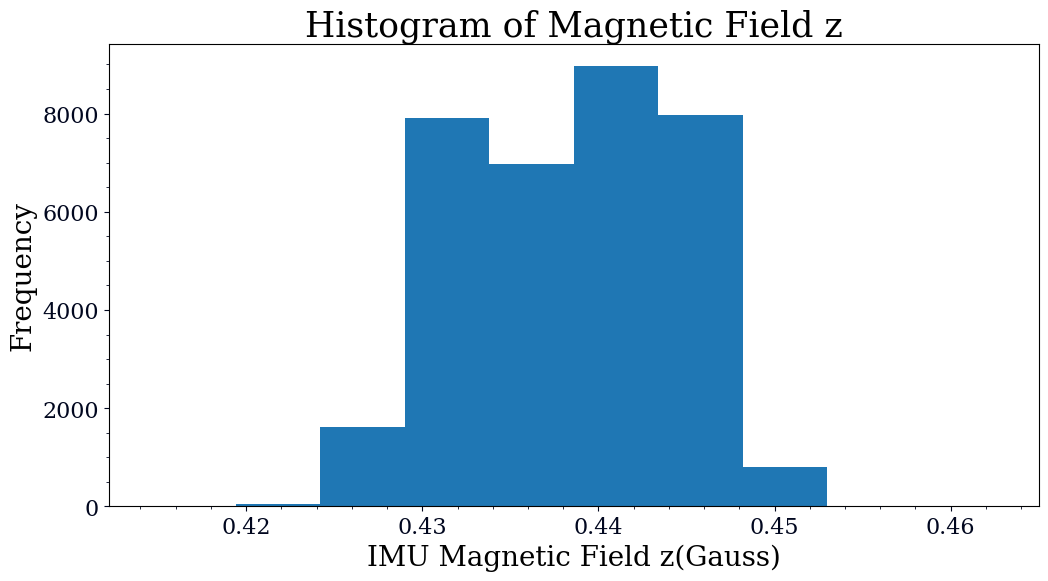

In [26]:
f['MagField.magnetic_field.z'].plot(kind='hist')
plt.title("Histogram of Magnetic Field z")
plt.xlabel("IMU Magnetic Field z(Gauss)")

In [27]:
def quaternion_to_euler(x, y, z, w):

        import math
        t0 = +2.0 * (w * x + y * z)
        t1 = +1.0 - 2.0 * (x * x + y * y)
        X = math.degrees(math.atan2(t0, t1))

        t2 = +2.0 * (w * y - z * x)
        t2 = +1.0 if t2 > +1.0 else t2
        t2 = -1.0 if t2 < -1.0 else t2
        Y = math.degrees(math.asin(t2))

        t3 = +2.0 * (w * z + x * y)
        t4 = +1.0 - 2.0 * (y * y + z * z)
        Z = math.degrees(math.atan2(t3, t4))

        return X, Y, Z

In [28]:
x= f['IMU.orientation.x']
y= f['IMU.orientation.y']
z= f['IMU.orientation.z']
w= f['IMU.orientation.w']
r_list=[]
p_list=[]
y_list=[]
for i in range(0,len(x)):
    [roll, pitch, yaw] = quaternion_to_euler(x[i],y[i],z[i],w[i])
    r_list.append(roll)
    p_list.append(pitch)
    y_list.append(yaw)

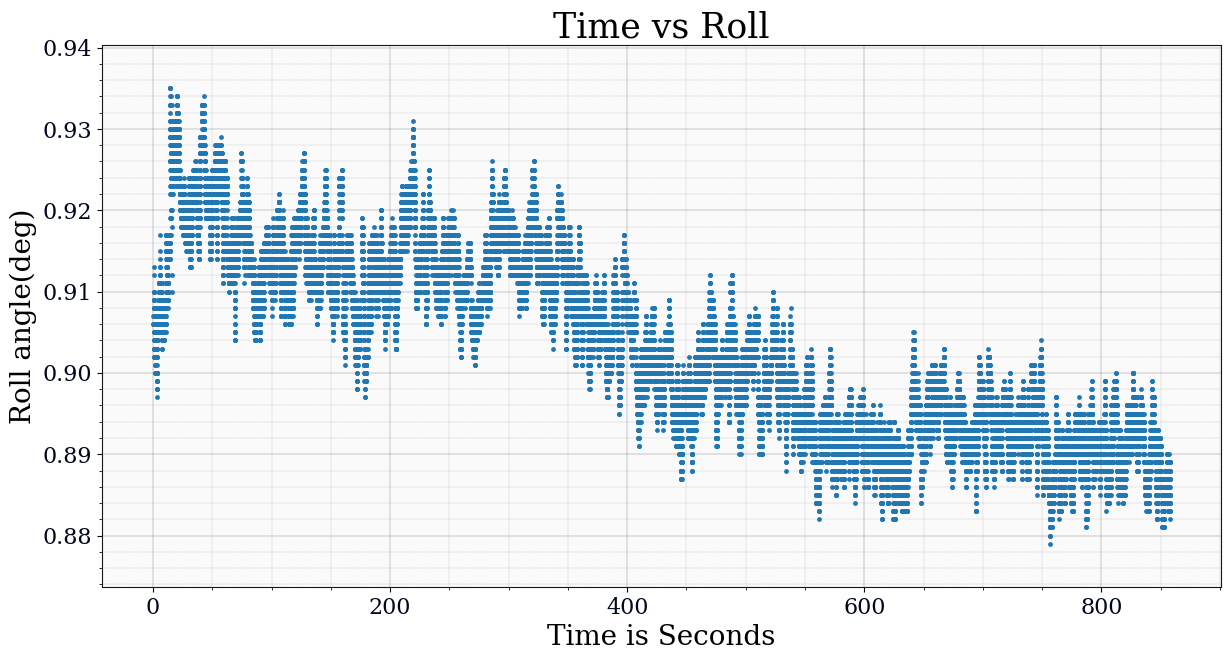

In [29]:
fig, a = bagpy.create_fig(1)
a[0].scatter(x=f['header.stamp.secs_offset'], y=r_list, data=f, s=6)
plt.title("Time vs Roll")
plt.xlabel("Time is Seconds")
plt.ylabel("Roll angle(deg)")
plt.show()

Text(0, 0.5, 'Frequency')

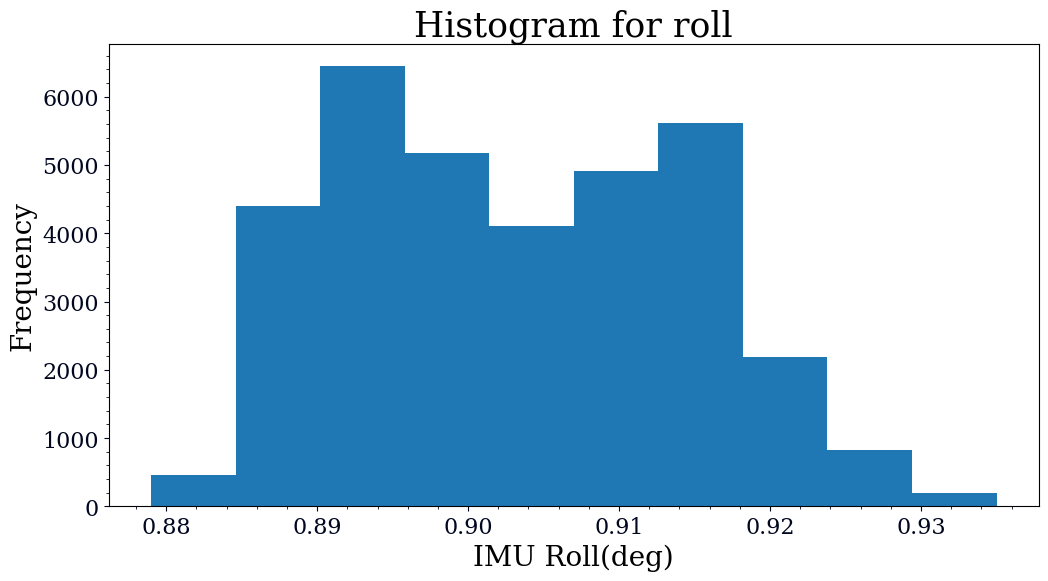

In [30]:
plt.hist(r_list)
plt.title("Histogram for roll")
plt.xlabel("IMU Roll(deg)")
plt.ylabel("Frequency")

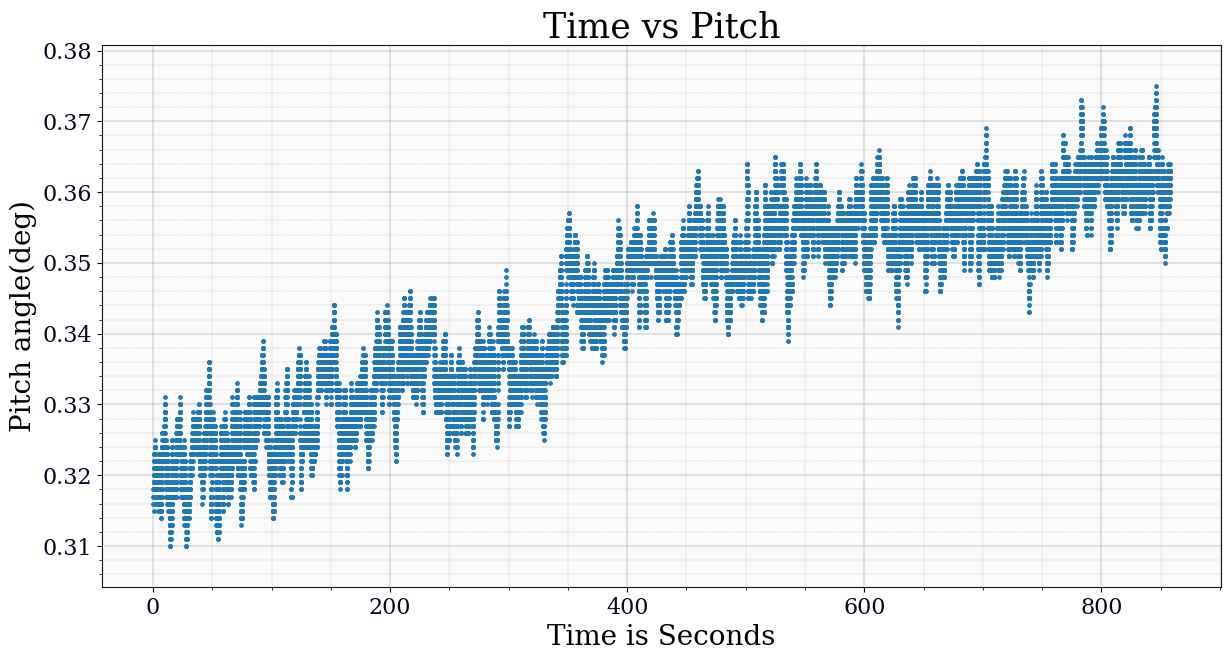

In [31]:
fig, a = bagpy.create_fig(1)
a[0].scatter(x=f['header.stamp.secs_offset'], y=p_list, data=f, s=6)
plt.title("Time vs Pitch")
plt.xlabel("Time is Seconds")
plt.ylabel("Pitch angle(deg)")
plt.show()

Text(0, 0.5, 'Frequency')

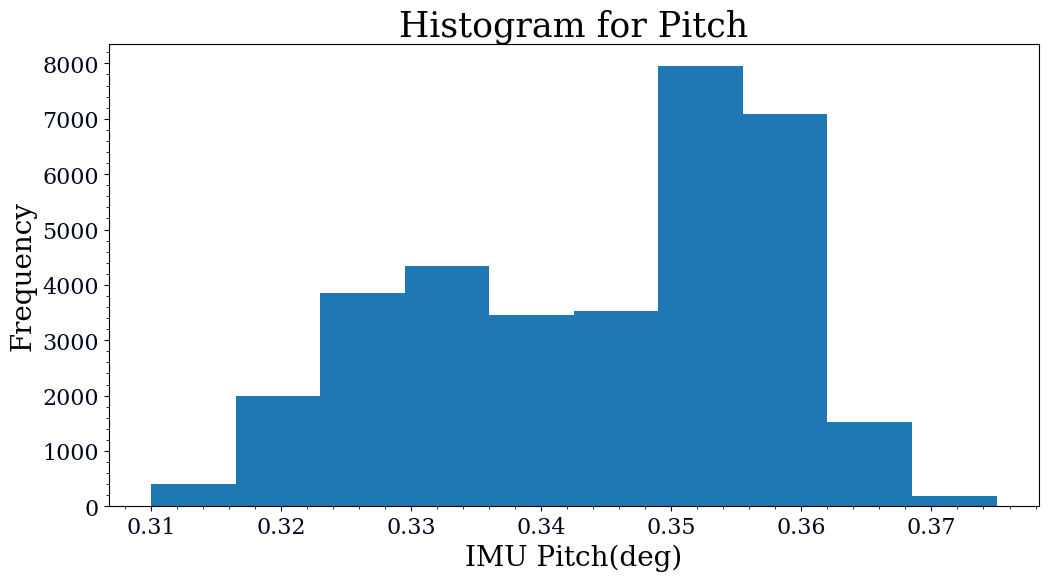

In [32]:
plt.hist(p_list)
plt.title("Histogram for Pitch")
plt.xlabel("IMU Pitch(deg)")
plt.ylabel("Frequency")

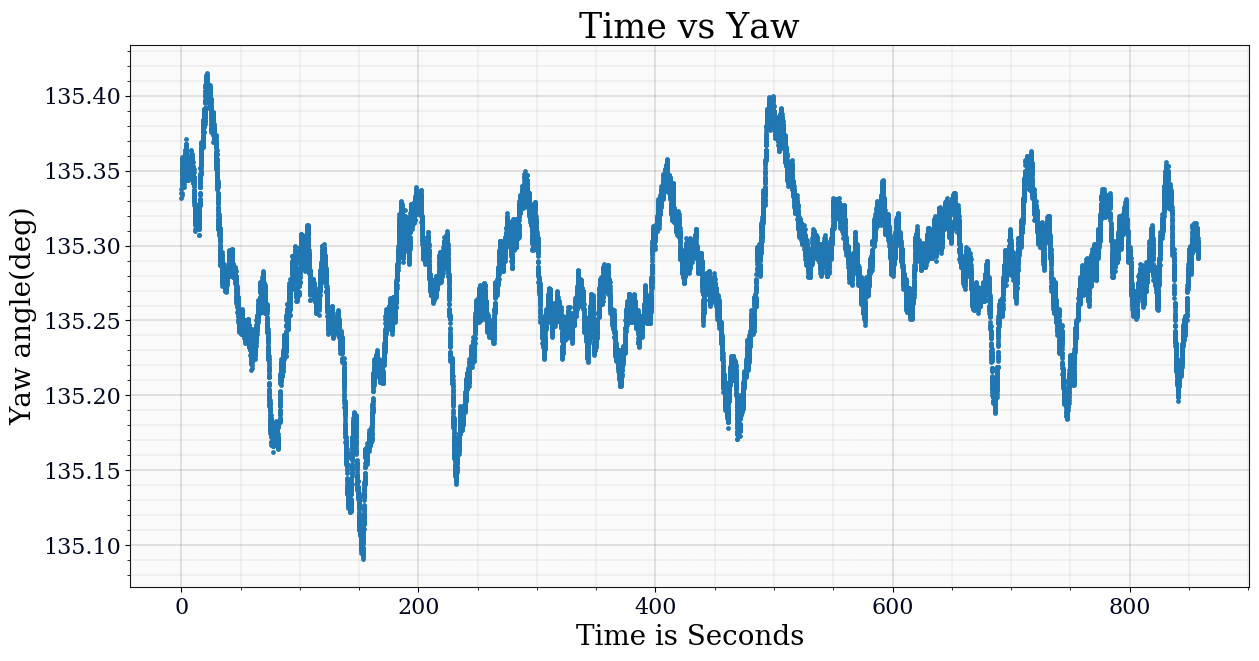

In [33]:
fig, a = bagpy.create_fig(1)
a[0].scatter(x=f['header.stamp.secs_offset'], y=y_list, data=f, s=6)
plt.title("Time vs Yaw")
plt.xlabel("Time is Seconds")
plt.ylabel("Yaw angle(deg)")
plt.show()

Text(0, 0.5, 'Frequency')

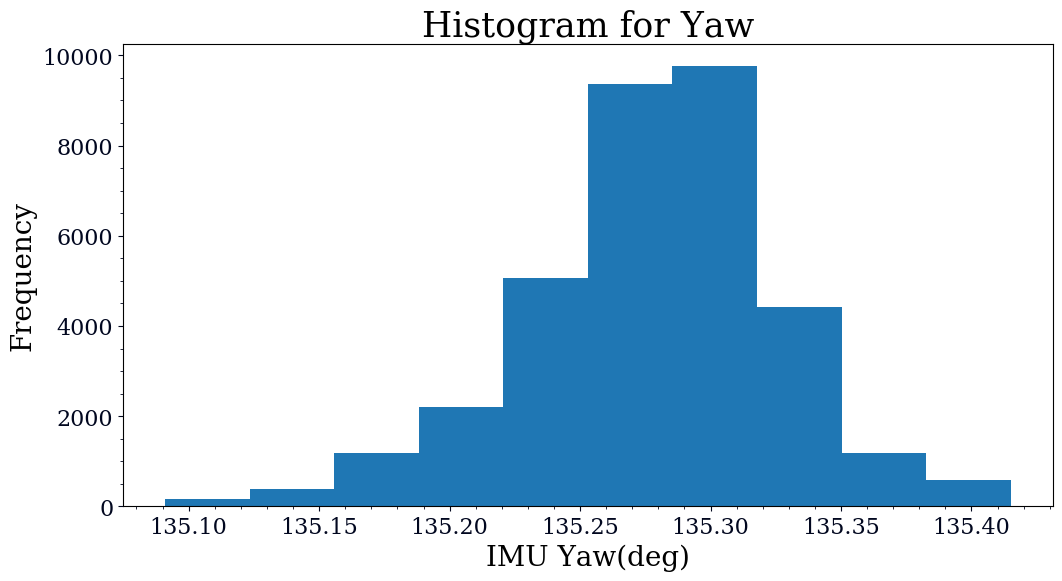

In [34]:
plt.hist(y_list)
plt.title("Histogram for Yaw")
plt.xlabel("IMU Yaw(deg)")
plt.ylabel("Frequency")